<a href="https://colab.research.google.com/github/mermerm/r_statistics/blob/master/16regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 선형회귀

# 회귀분석
* 상관분석은 변수들이 얼마나 밀접한 관계를 가지고 있는지 분석하는 통계기법
* 한편, 회귀분서은 (상관분석+예측)하는 통계기법
수량형 값을 예측하는데 주로 사용되는 통계 모형
   * 즉, 변수간의 선형(직선)관계를 식으로 표현하고
   * 독립변수가 주어지면 종속변수의 값이 얼마인지 추정
* 독립변수와 종속변수 사이의 관계를 선형방정식으로 나타낸 것을 회귀방정식이라 함

$ y = \alpha + \beta  x + \epsilon $
   * $ \alpha $ : 절편
   * $ \beta $ : 기울기
   * $ \epsilon $ : 잡음, 오차를 유발하는 미지의 요소

* R에서는 회귀모델을 만들 때 lm 함수를 사용
lm(종속변수~독립변수)


Call:
lm(formula = sales ~ ad)

Coefficients:
(Intercept)           ad  
     62.929        2.186  


[1] 128.63

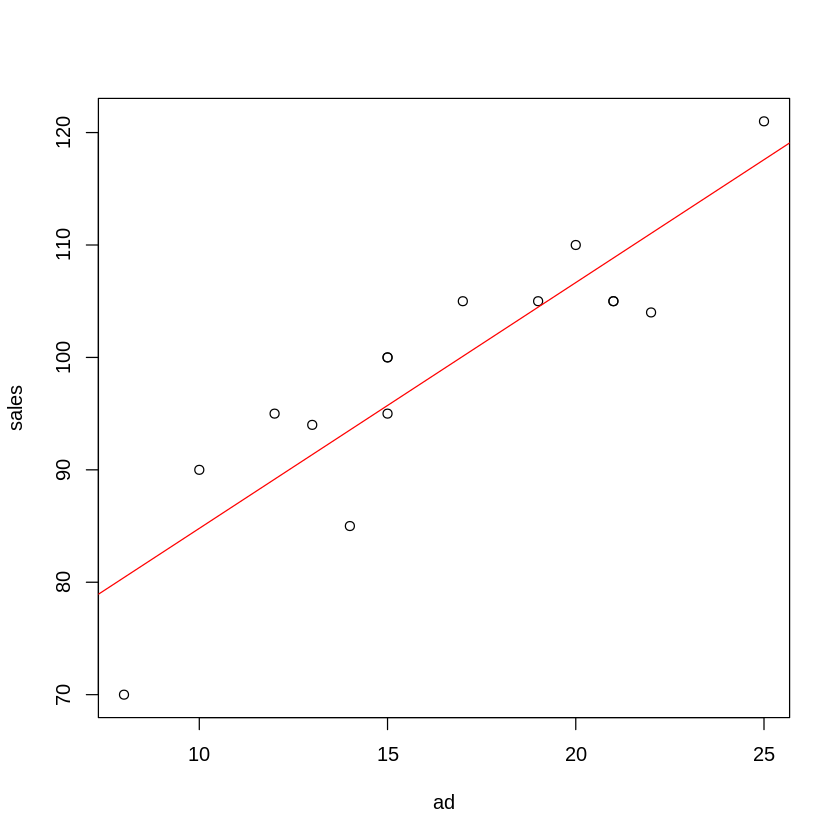

In [ ]:
# A회사의 광고비 지출이 매출에 어느정도 영향을 주는지 파악
# 아울러 회귀분석을 통해 광고비 증가(30)시 매출액은 얼마나 증가할지 예상해 봄

# R에서 선형회귀는 lm, predict함수를 사용
# lm(종속~독립)

ad <- c(13,8,10,15,12,15,14,15,17,19,20,21,22,21,25)
sales <- c(94,70,90,100,95,100,85,95,105,105,110,105,104,105,121)

lm(sales~ad)  #intercept : 절편, ad : 기울기
# y =62.93+2.19x

# 광고비 30 투입 시 매출액은?
y <- 62.93 + 2.19*30
y

# 회귀모델 시각화
plot(ad, sales)
abline(lm(sales~ad), col='red')


Call:
lm(formula = dist ~ speed, data = cars)

Coefficients:
(Intercept)        speed  
    -17.579        3.932  


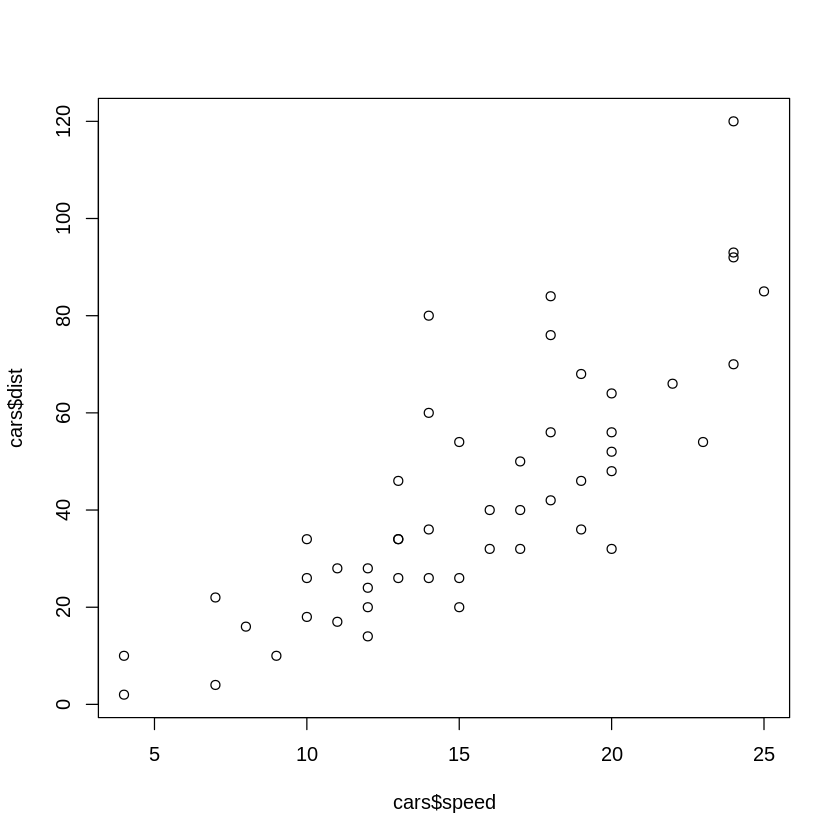

[1] 100.32 119.97 139.62

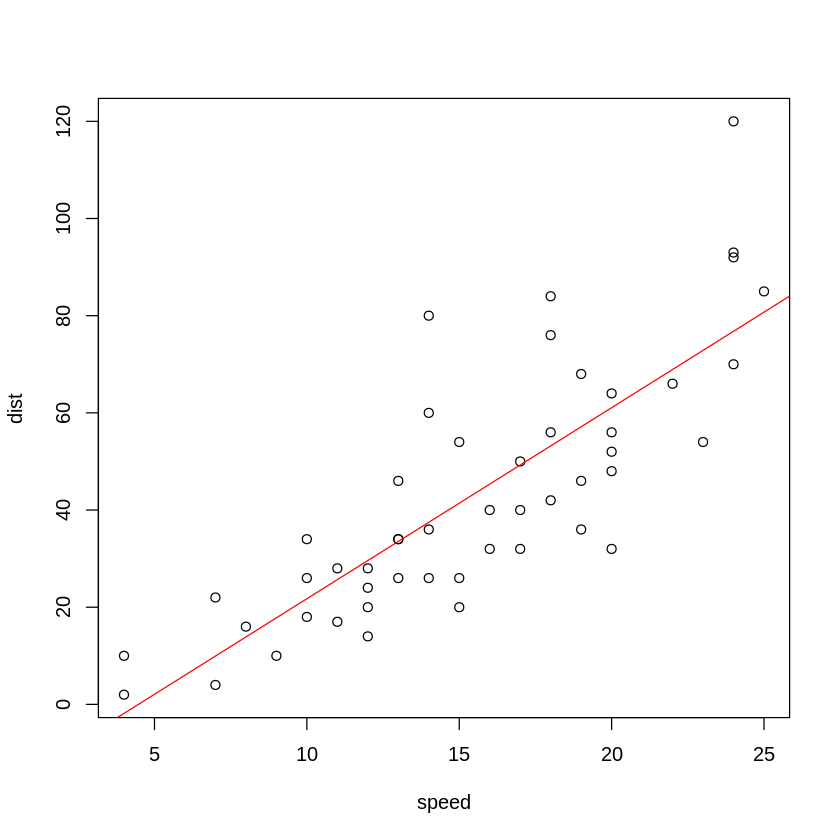

In [ ]:
# cars 데이터셋을 이용해서 속도speed에 따른 제동거리를dist 예측하는 회귀방정식을 작성해보고 시각화도 하세요.
# 또한, 주행속도가 30, 35, 40일 때 제동거리를 예측하세요.
plot(cars$speed, cars$dist)
lm(dist~speed, cars)
# -17.58, 3.93
# y = -17.58+3.93x

plot(cars)
abline(lm(dist~speed, cars), col='red')

x = c(30, 35, 40)
-17.58+3.93*x

In [ ]:
# 단순선형 회귀식을 직접 구해보기
# 절편 : mean(종속변수) - 기울기*mean(독립변수)
# 기울기 : 상관계수*(sd(종속변수)/sd(독립변수))

# 기울기
s <- cars$speed
d <- cars$dist
b <- cor(s, d) * (sd(d)/sd(s))
a <- mean(d) - b*mean(s)
a
b

[1] -17.57909

In [ ]:
# 광고비ad 대비 매출액sales을 예측하는 회귀모형을 만들려고 한다. 수식을 이용해서 기울기와 절편을 계산하고 회귀식을 작성하세요.

ad <- c(13,8,10,15,12,15,14,15,17,19,20,21,22,21,25)
sales <- c(94,70,90,100,95,100,85,95,105,105,110,105,104,105,121)

adb <- cor(ad, sales) * (sd(sales)/sd(ad))
adb
ada <- mean(sales) - adb*mean(ad)
ada
# y = 62.93+2.19x

[1] 2.18649

[1] 62.92913

[1] 3.932409

[1] -17.57909

In [ ]:
# 최소제곱법 (독립변수가 하나일 때 적용)
# 기울기 = {(x - x 평균)(y - y평균)의 합} / (x-x평균)제곱의 합
# 절편 = y평균-(x평균*기울기)

# cars 데이터셋을 이용해서 속도speed에 따른 제동거리를dist 예측하는 회귀방정식을 작성
s <- cars$speed
d <- cars$dist
upper <- sum((s-mean(s))*(d-mean(d)))
lower <- sum((s-mean(s))**2)
b <- upper/lower
b
a <-mean(d) - (mean(s)*b)
a
#y=17.58+3.93*x

[1] 3.932409

[1] -17.57909

[1] 2.3

[1] 79

[1] 102


Call:
lm(formula = jumsu ~ times)

Coefficients:
(Intercept)        times  
       79.0          2.3  


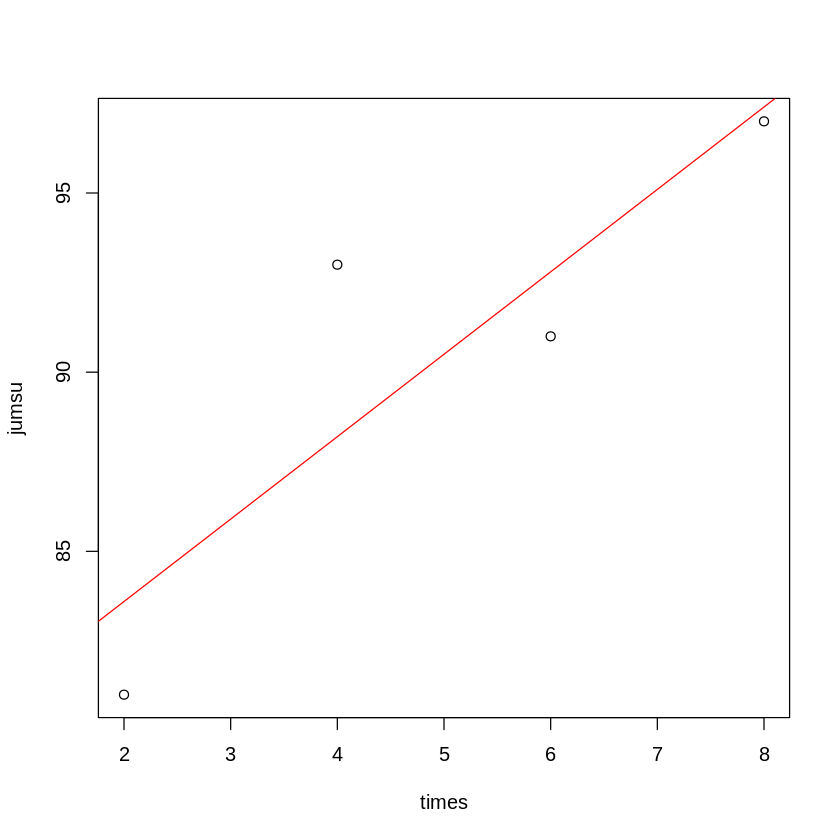

In [ ]:
# 시험시간과 성적 데이터를 이용해서 회귀식을 구하고 시각화를 하세요. 또한, 10시간 공부시 점수는 얼마인가 예측하세요.
times <- c(2, 4, 6, 8)
jumsu <- c(81, 93, 91, 97)
t <- mean(times)
j <- mean(jumsu)
 
b <- sum((times-t)*(jumsu-j)) / sum((times-t)**2)
a <- j - t*b
b
a
# y = 2.3x+79
plot(times, jumsu)
abline(lm(jumsu~times), col='red')
# x = 10
 y <- 2.3*10 + 79
 y 

# 회귀식의 예측력 평가

In [ ]:
model1 <- lm(jumsu~times)
summary(model)


Call:
lm(formula = jumsu ~ times)

Residuals:
   1    2    3    4 
-2.6  4.8 -1.8 -0.4 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)   79.000      4.990  15.832  0.00397 **
times          2.300      0.911   2.525  0.12756   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.074 on 2 degrees of freedom
Multiple R-squared:  0.7612,	Adjusted R-squared:  0.6417 
F-statistic: 6.373 on 1 and 2 DF,  p-value: 0.1276


## 분석결과 알아보기
* 결정계수(Multiple R-squared, R^2) : 0.75이상인 경우 >> 회귀모형이 나름의 의미가 있음
* 회귀계수 유의성(Pr(>|t|)) : 유의확률이 0.05 이하인 경우 >> 회귀계수가 나름의 유의미가 있다고 함
* 조정된 결정계수(Adjusted R-squared) : 표본의 수가 많아지면 정확도가 올라가는데 이러한 부분을 제약하기 위해 사용하는 지표(표본수가 많을때 보면 됨(50개 이상))
* F통계값과 p-value(F-statistic) : 회귀모형에 대한 통계적 유의미 검증 결과 의미. 즉, 독립변수와 종속변수의 관계가 선형으로 볼 수 있는지 파악(0.05 기준)

In [ ]:
# 광고비 대비 매출액을 산출하는 회귀모형에 대해 분석을 실시하세요.
model2 <- lm(sales~ad)
summary(model2)

In [ ]:
# 차량 속도 대비 제동거리에 대한 회귀모형을 분석해보세요.
model3<- lm(d~s)
summary(model3)


Call:
lm(formula = d ~ s)

Residuals:
    Min      1Q  Median      3Q     Max 
-29.069  -9.525  -2.272   9.215  43.201 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -17.5791     6.7584  -2.601   0.0123 *  
s             3.9324     0.4155   9.464 1.49e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 15.38 on 48 degrees of freedom
Multiple R-squared:  0.6511,	Adjusted R-squared:  0.6438 
F-statistic: 89.57 on 1 and 48 DF,  p-value: 1.49e-12


# 회귀모형의 적합성 검정
 광고비 대비 매출액을 예측하는 회귀모형을 만들었는데 이것이 과연 적합한 것일까?
 회귀모형 작성시 적절한 필요조건을 만족하는지 알아봄
 선형성/정규성/분산성/독립성(반시계방향)

1) 선형성(Residuals ve Fitted) : 잔차 예측비교도
* 잔차를 표준화시켜 정규분포를 따르는지 확인
* 점선은 직선에 가깝게, 분포의 모양이 위 아래 균등하게 배치

2) 정규성(Normal Q-Q) : 독립변수가 정규성을 띄면 잔차도 정규분포를 띄는가?
* 45도 점선에 점들이 가깝게 배치
* 단, 양 끝점들은 점선에서 벗어나도 무난

3) 분산성(Scale-Location): 잔차 분산비교도
* 독립변수의 분산이 일정하면? 잔차도 비슷한 양상을 띄는가?
* 점선은 직선에 가깝게, 분포의 모양이 위 아래 균등하게 배치

4) 독립성(Residuals vs Leverage) : 잔차의 영향력 파악
* cook's distance
* 회귀방정식의 계수결정에 불균형한 영향을 미치는 독립변수 존재 파악
* 회귀분석에서 잔차의 크기가 큰 데이터는 보통 이상치로 취급
* cook's distance를 통해 잔차와 리버레지를 동시에 볼수 있음
* 빨간선은 직선에 가깝게, 점들 분포는 되도록 빨간선에 가깝게,
* 단, 빨간점선 밖은 벗어나지 않게

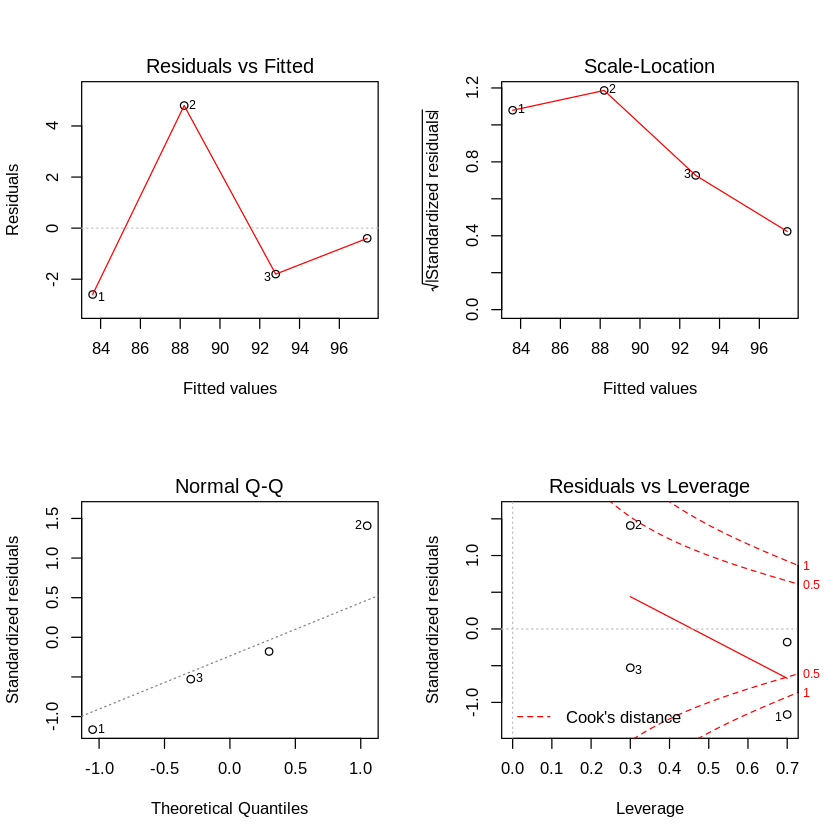

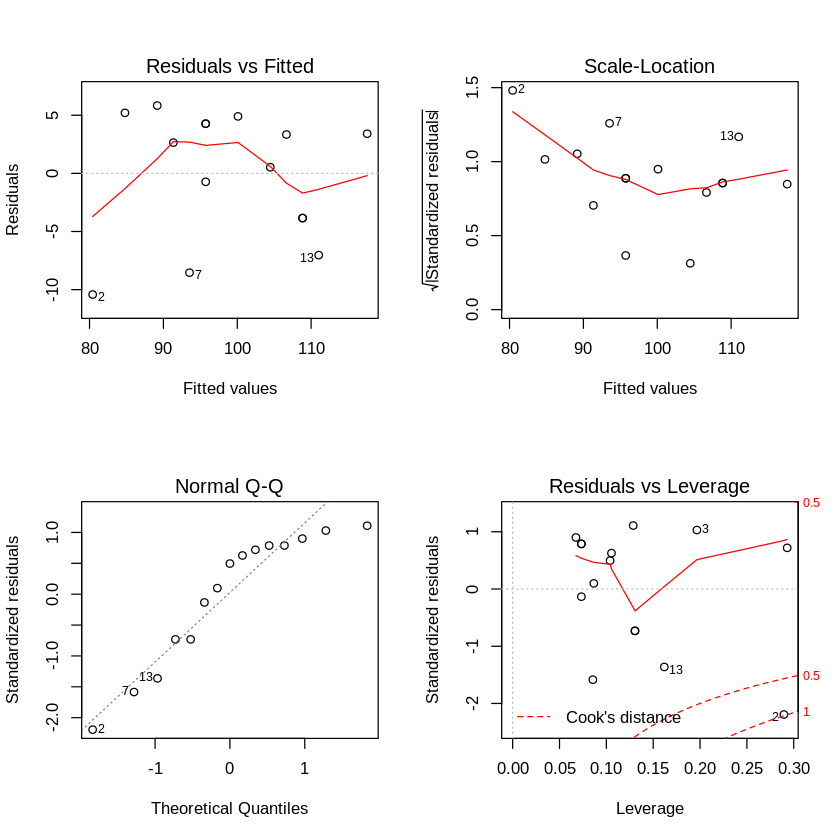

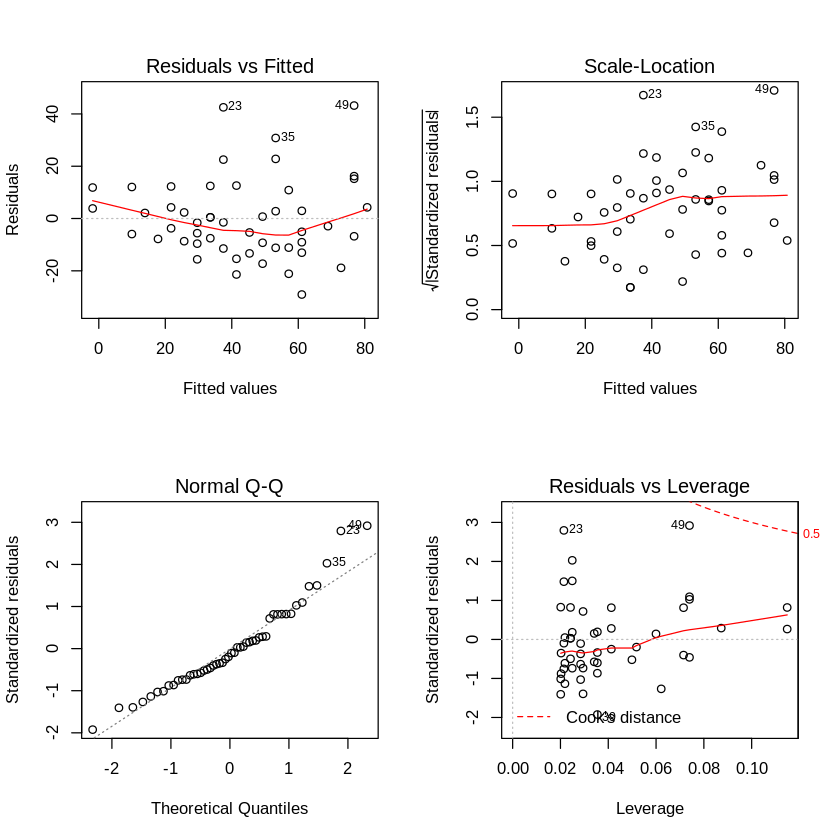

In [ ]:
par(mfcol=c(2,2))  #2*2 행렬 그래프를 그리자
plot(model1)

par(mfcol=c(2,2))
plot(model2)

par(mfcol=c(2,2))
plot(model3)

[1] 15.96746

[1] 1110.526


Call:
lm(formula = p ~ a)

Coefficients:
(Intercept)            a  
    1110.53        15.97  


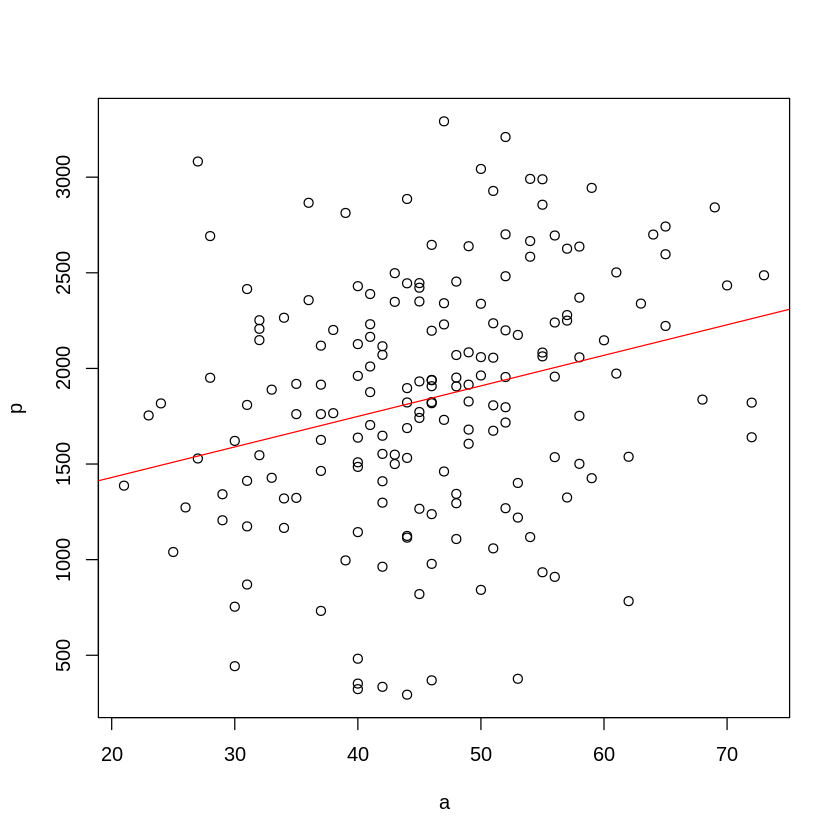


Call:
lm(formula = p ~ a)

Residuals:
     Min       1Q   Median       3Q      Max 
-1579.80  -368.48    51.41   420.53  1540.35 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1110.526    207.915   5.341 2.79e-07 ***
a             15.967      4.417   3.615 0.000391 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 623 on 178 degrees of freedom
Multiple R-squared:  0.0684,	Adjusted R-squared:  0.06316 
F-statistic: 13.07 on 1 and 178 DF,  p-value: 0.0003907


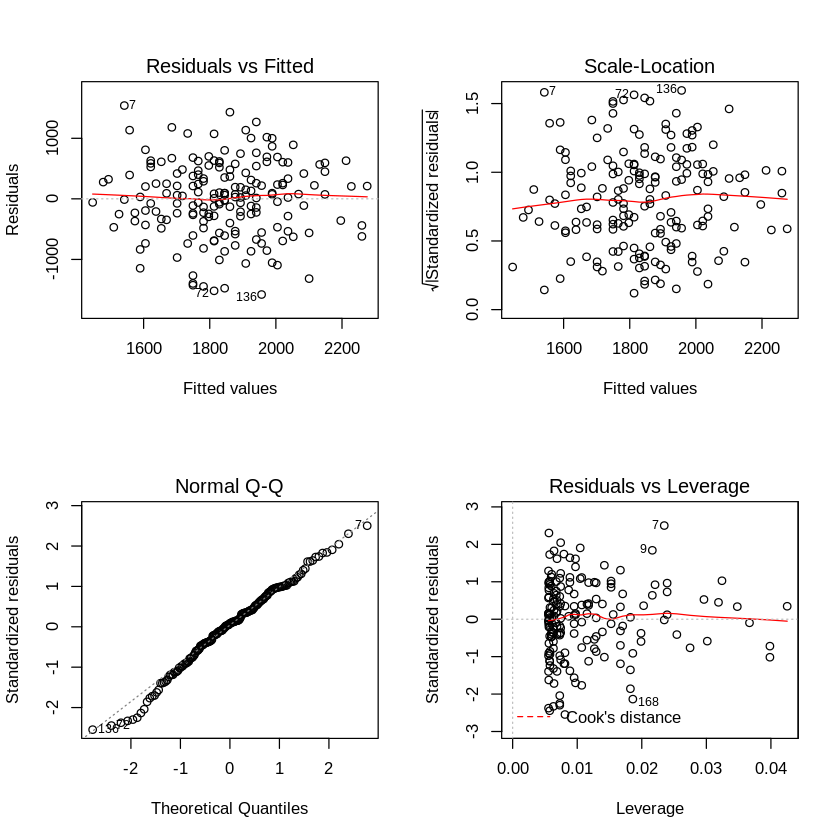

In [ ]:
#  applewood 데이터를 기초로 해서 구매자 연령과 판매이익간의 관계를 최소제곱법을 이용해서 선형방정식으로 나타내시오.
applewood <- read.csv('https://raw.githubusercontent.com/mermerm/r_statistics/master/datasets/applewood.txt', header=T, sep=' ', na.strings=)
a <- applewood$Age
p <- applewood$Profit
library(stringr)
p <- str_remove_all(p, '\\$')
p <- str_remove_all(p, ',')
p <- as.integer(p)

# 혹은, gsub(찾을문자, 바꿀문자, 대상)을 사용
# p <- gsub(',', '', p)
# p <- gsub('\\$', '', p)
# p <- as.numeric(p)

ma <- mean(a)
mp <- mean(p)

rldnfrl <- sum((a-ma)*(p-mp)) / sum((a-ma)**2)
wjfvus <- mp - (ma*rldnfrl)
rldnfrl
wjfvus
# y = 15.97x + 1110.53
lm(p~a)

plot(a, p)
abline(lm(p~a), col='red')

par(mfcol=c(2,2))
plot(lm(p~a))
summary(lm(p~a))

[1] -0.8743956

[1] -0.9596273

[1] 29.3882

[1] 48.59

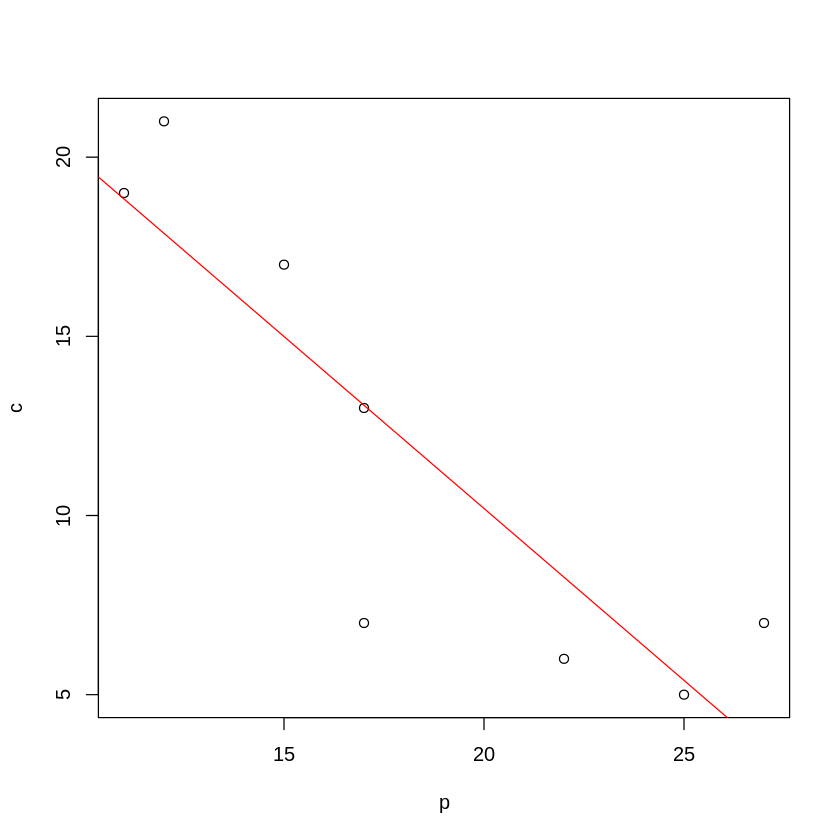


Call:
lm(formula = p ~ c)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.1341 -1.0914  0.2398  1.0833  4.8659 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  27.7112     2.4039  11.528 2.56e-05 ***
c            -0.7967     0.1805  -4.414   0.0045 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.078 on 6 degrees of freedom
Multiple R-squared:  0.7646,	Adjusted R-squared:  0.7253 
F-statistic: 19.49 on 1 and 6 DF,  p-value: 0.004499


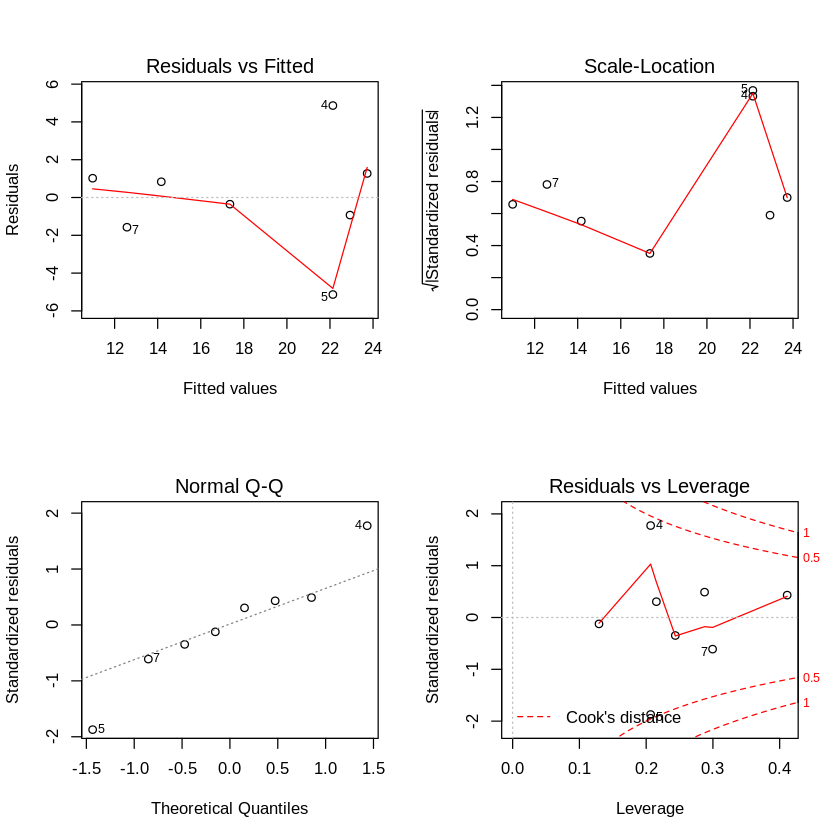

In [ ]:
# 시의회에서 범죄 발생률을 낮추기 위해 경찰관을 늘리고자 함. 다른 시의 경찰관 수와 범죄 발생건수를 토대로 산점도를 그리고,
# 상관계수와 회귀방정식을 구해서 경찰관 수가 20일 대 범죄발생율은? (citycrime.txt)
crime <- read.csv('https://raw.githubusercontent.com/mermerm/r_statistics/master/datasets/citycrime.txt', header=T, sep='	', na.strings = ) # 탭 :  '\t'

p <- crime$Police
c <- crime$Crimes

cor(p, c)   # -0.874... 음의 상관관계

mp <- mean(p)
mc <- mean(c)

rldnfrlc <- sum((p-mp)*(c-mc)) / sum((p-mp)**2)
wjfvusc <- mc - (mp*rldnfrlc)
rldnfrlc
wjfvusc
# y = 0.96x + 29.39

plot(p, c)
abline(lm(c~p), col='red')

# x = 20
0.96*20 + 29.39

par(mfcol=c(2,2))
plot(lm(p~c))

summary(lm(p~c))

# 예측구간 추정
* 추정치의 표준오차와 결정계수를 통해 회귀식의 종속변수 예측력에 대한 전반적인 평가를 내렸음
* 회귀식의 예측력을 표현하는 또 다른 방법은 독립변수의 특정값을 신뢰구간으로 계산하여 제시

### R에서 제공하는 함수를 통해 신뢰/예측구간을 알 수 있음
* model <- lm(종속변수~독립변수)
* cof(model) : 회귀계수(절편, 기울기)
* residuals(mode) : 추정치 대비 잔차
* deviance(model) : 잔차 제곱합
* confint(model) : 회귀계수 신뢰구간
* predict(model, interval='cofidence', newdata = 데이터프레임)  >> 신뢰구간
* predict(model, interval='prediction', newdata = 데이터프레임)  >> 예측구간


(Intercept)       speed 
 -17.579095    3.932409

1          2          3          4          5          6          7 
  3.849460  11.849460  -5.947766  12.052234   2.119825  -7.812584  -3.744993 
         8          9         10         11         12         13         14 
  4.255007  12.255007  -8.677401   2.322599 -15.609810  -9.609810  -5.609810 
        15         16         17         18         19         20         21 
 -1.609810  -7.542219   0.457781   0.457781  12.457781 -11.474628  -1.474628 
        22         23         24         25         26         27         28 
 22.525372  42.525372 -21.407036 -15.407036  12.592964 -13.339445  -5.339445 
        29         30         31         32         33         34         35 
-17.271854  -9.271854   0.728146 -11.204263   2.795737  22.795737  30.795737 
        36         37         38         39         40         41         42 
-21.136672 -11.136672  10.863328 -29.069080 -13.069080  -9.069080  -5.069080 
        43         44         45         46         47         48         49 
  2.930920  -2.933898 -18.866307  -6.798715  15.201285  16.201285  43.201285 
        50 
  4.268876

[1] 11353.52

[1] 106.5529

,2.5 %,97.5 %
(Intercept),-31.167850,-3.990340
speed,3.096964,4.767853


,fit,lwr,upr
1,-1.849460,-12.329543,8.630624
2,-1.849460,-12.329543,8.630624
3,9.947766,1.678977,18.216556
4,9.947766,1.678977,18.216556
5,13.880175,6.307527,21.452823
6,17.812584,10.905120,24.720047
7,21.744993,15.461917,28.028068
8,21.744993,15.461917,28.028068
9,21.744993,15.461917,28.028068
10,25.677401,19.964525,31.390278


,fit,lwr,upr
1,100.3932,87.43543,113.3509


,fit,lwr,upr
1,120.0552,84.79233,155.3181


,fit,lwr,upr
1,120.0552,103.1066,137.0038
2,139.7173,118.7052,160.7293
3,159.3793,134.2664,184.4922


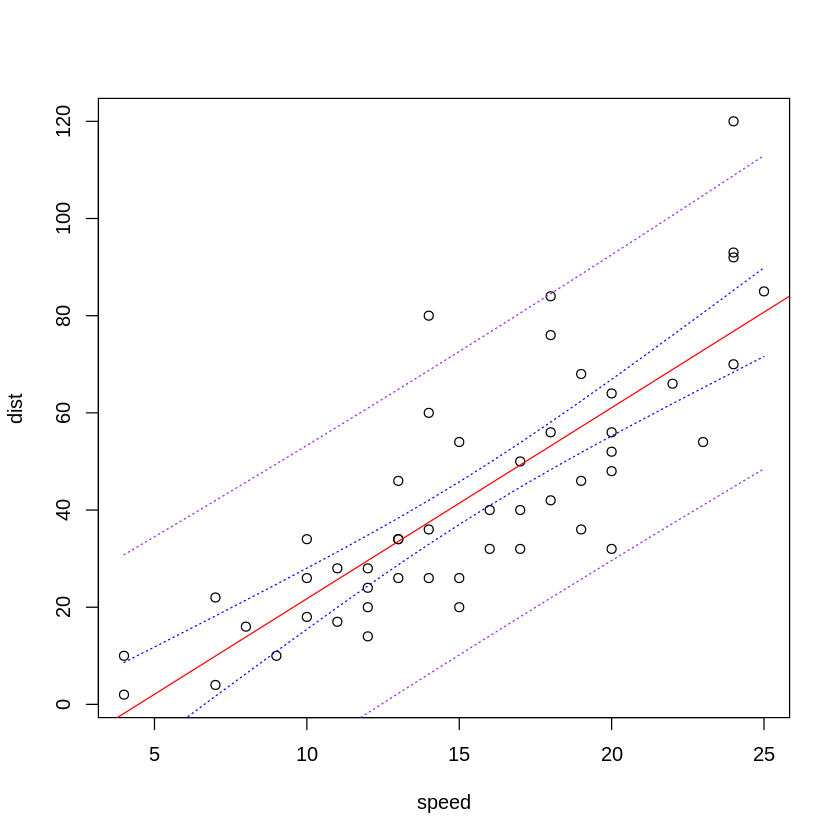

In [ ]:
# 차량속도 대비 제동거리에 대한 회귀모형에 대해 차량속도가 35, 40, 45일 때 제동거리를 신뢰구간 95%로 예측구간을 분석해보세요.
model <- lm(dist~speed, cars)
coef(model)
residuals(model)
deviance(model)  # 분산
sqrt(deviance(model))  # 표준편차
confint(model)

predict(model, interval='confidence')
# 기존 데이터를 이용한 신뢰구간 알아봄

predict(model, interval='confidence', newdata=data.frame(speed=30)) # 이 구간에서 5%씩 조절하면 신뢰구간이 됨(현재 100%)

predict(model, interval='prediction', newdata=data.frame(speed=35))

predict(model, interval='confidence', newdata=data.frame(speed=c(35, 40, 45))) 

# 신뢰구간/예측구간을 그래프로 그려보기
# 매끈한 선으로 그래프를 그리기 위해 독립/종속변수를 재생성
speed <- seq(min(s), max(s), 1)
# 차량속도의 구간을 최소값에서 최대값 사이 1간격으로 재설정
cdist <- predict(model, interval='confidence', newdata=data.frame(speed=speed))
pdist <- predict(model, interval='prediction', newdata=data.frame(speed=speed))

plot(cars)
abline(model, col='red')
lines(speed, cdist[, 2], col='blue', lty=3)  # 하한
lines(speed, cdist[, 3], col='blue', lty=3)  # 상한
lines(speed, pdist[, 2], col='purple', lty=3)  # 하한
lines(speed, pdist[, 3], col='purple', lty=3)  # 상한


[1] 0.9791822

(Intercept)           t 
  24.465436    7.987899


Call:
lm(formula = w ~ t)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.3202 -11.3081  -0.3444  11.1162  17.5346 

Coefficients:
            Estimate Std. Error t value     Pr(>|t|)    
(Intercept)  24.4654     6.7279   3.636      0.00456 ** 
t             7.9879     0.5236  15.255 0.0000000297 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 12.29 on 10 degrees of freedom
Multiple R-squared:  0.9588,	Adjusted R-squared:  0.9547 
F-statistic: 232.7 on 1 and 10 DF,  p-value: 0.00000002974


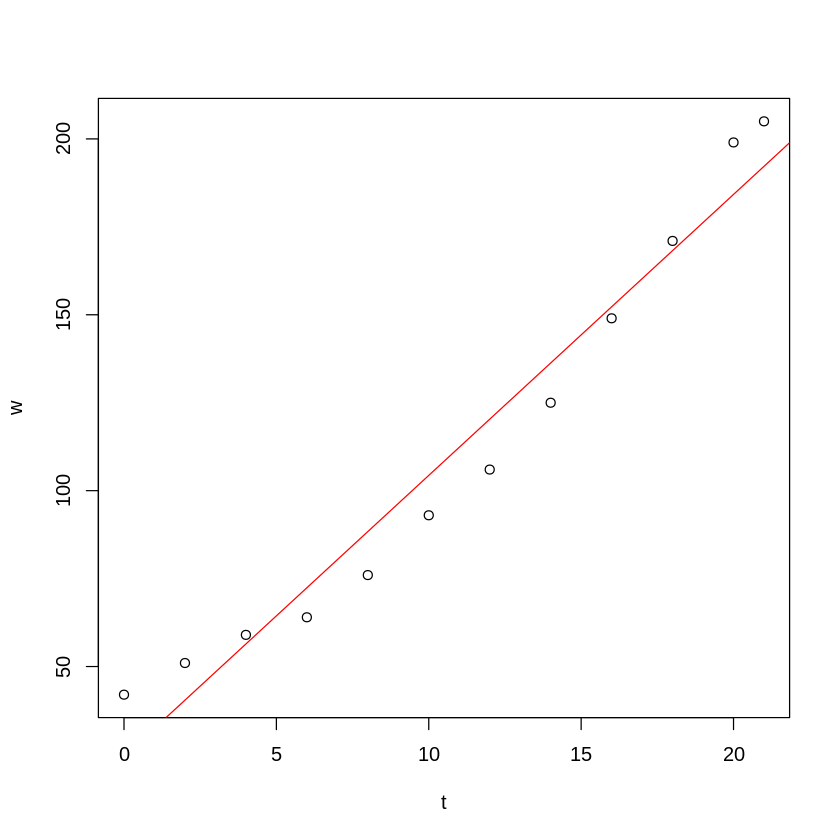

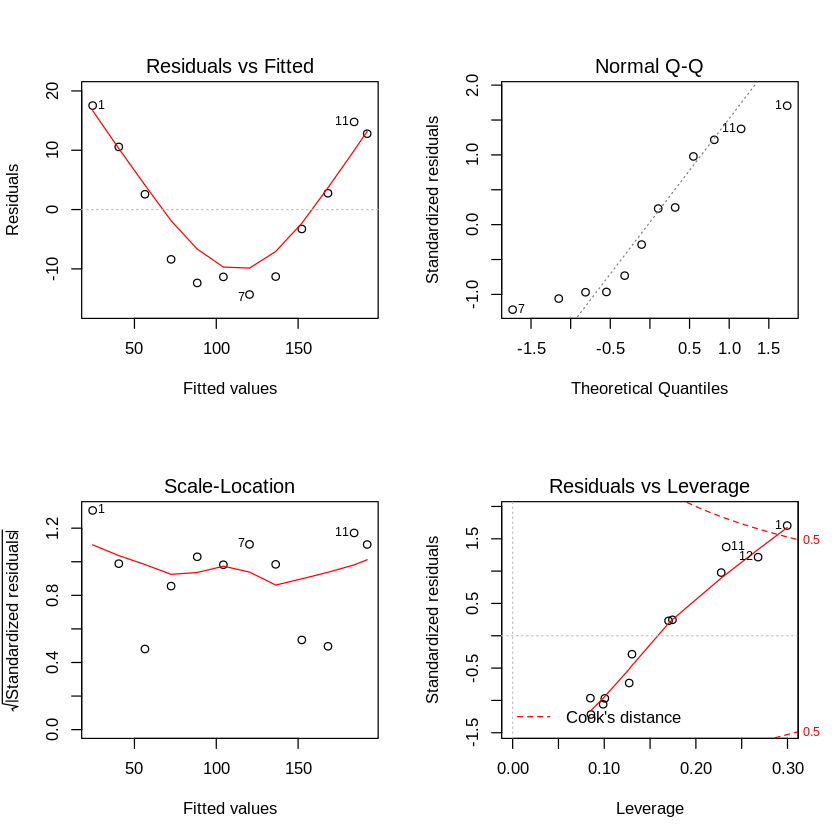

In [ ]:
# 식이요법을 적용한 닭에 대한 데이터(MASS, ChickWeight) '1'번 닭을 대상으로 시간 대비 몸무게에 대한 회귀분석을 실시하시오.
library(MASS)
# weight : 닭 몸무게
# time : 몸무게 측정시 병아리 나이(일수)
# chick : 닭 번호
# diet : 닭 모이 종류

w <- ChickWeight[ChickWeight$Chick == 1, 1]
t <- ChickWeight[ChickWeight$Chick == 1, 2]

cor(t, w)

model <- lm(w~t)

plot(t, w)
abline(model, col='red')

coef(model)
# y = 24.47+7.99x

options(scipen=100)  # 십진수로 표시
summary(model)

par(mfrow=c(2,2))
plot(model)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



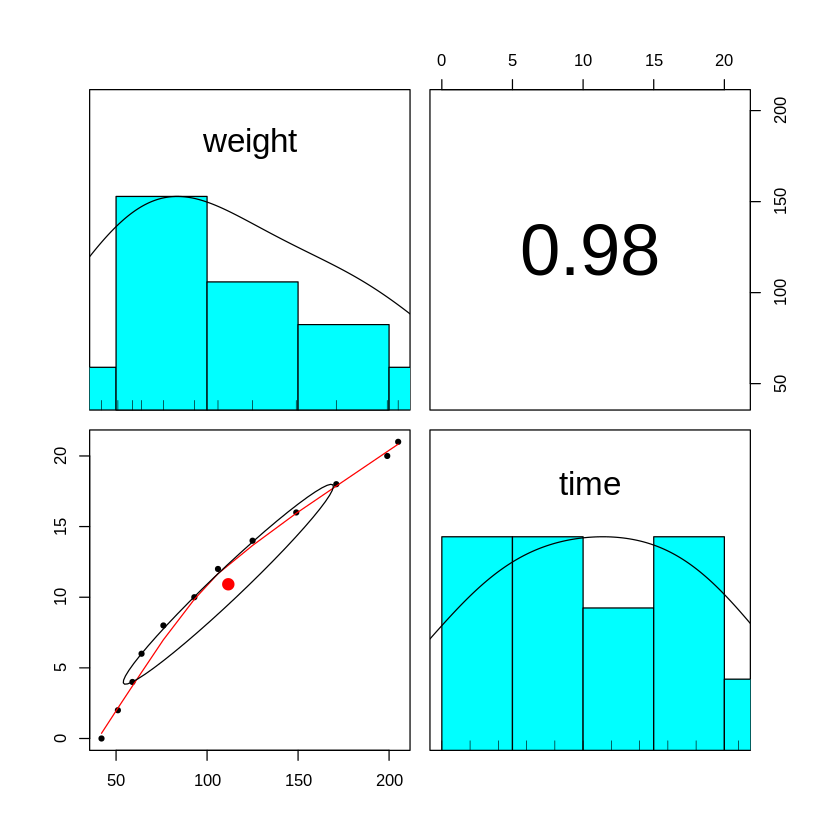

In [ ]:
install.packages('psych')
library(psych)
pairs.panels(data.frame(weight=w, time=t))